<a href="https://colab.research.google.com/github/xinruili07/MusicGenreClassifier/blob/master/CNN_Spectrogram_Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!mkdir genres
!unzip -q "/content/genres.zip"

mkdir: cannot create directory ‘genres’: File exists
replace genres/pop/pop.00080.au? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/genres/pop/._pop.00080.au? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace genres/pop/pop.00022.au? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
### Importing Libraries

import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt

import os
from PIL import Image
from pathlib import Path
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
import keras

In [25]:
import librosa.display

songname = f'./genres/blues/blues.00000.au'
y, sr = librosa.load(songname, mono=True, duration=2, offset=0)
ps = librosa.feature.melspectrogram(y=y, sr=sr, hop_length = 256, n_fft = 512, n_mels=128)
ps = librosa.power_to_db(ps**2)
ps.shape

(128, 173)

In [0]:
dataset = []
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
        'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

for genre, genre_number in genres.items():
    for filename in os.listdir(f'./genres/{genre}'):
        songname = f'./genres/{genre}/{filename}'
        for index in range(8):
            y, sr = librosa.load(songname, mono=True, duration=2, offset=index*3)
            ps = librosa.feature.melspectrogram(y=y, sr=sr, hop_length = 256, n_fft = 512, n_mels=64)
            ps = librosa.power_to_db(ps**2)
            dataset.append( (ps, genre_number) )               

In [27]:
print(len(dataset))

import random

random.shuffle(dataset)

train = dataset[:6000]
valid = dataset[6000:7000]
test = dataset[7000:]

X_train, Y_train = zip(*train)
X_valid, Y_valid = zip(*valid)
X_test, Y_test = zip(*test)

# Reshape for CNN input
X_train = np.array([x.reshape( (64, 173, 1) ) for x in X_train])
X_valid = np.array([x.reshape( (64, 173, 1) ) for x in X_valid])
X_test = np.array([x.reshape( (64, 173, 1) ) for x in X_test])

# One-Hot encoding for classes
Y_train = np.array(keras.utils.to_categorical(Y_train, 10))
Y_valid = np.array(keras.utils.to_categorical(Y_valid, 10))
Y_test = np.array(keras.utils.to_categorical(Y_test, 10))


8000


In [62]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import AveragePooling2D

from keras import regularizers
'''
model = Sequential()
input_shape=(64, 173, 1)
model.add(Conv2D(64, kernel_size=(4, 4),
                     activation='relu', #kernel_regularizer=regularizers.l2(0.04),
                     input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 4)))
model.add(Conv2D(64, (3, 5), activation='relu'
                    , kernel_regularizer=regularizers.l2(0.04)
                    ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (2, 2), activation='relu'
       # , kernel_regularizer=regularizers.l2(0.04)
        ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.04)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.04)))
model.add(Dense(10, activation='softmax'))

input_shape=(64, 173, 1)
model = Sequential()
model.add(Conv2D(10, kernel_size=(3,3), strides=(1,1),
                 activation='relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))

model.add(Conv2D(20, kernel_size=(3,3), strides=(1,1),
                 activation='relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))

model.add(Conv2D(40, kernel_size=(3,3), strides=(1,1),
                 activation='relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))

model.add(Conv2D(80, kernel_size=(3,3), strides=(1,1),
                 activation='relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
'''

model = Sequential()
input_shape=(64, 173, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 60, 169, 24)       624       
_________________________________________________________________
average_pooling2d_13 (Averag (None, 30, 84, 24)        0         
_________________________________________________________________
activation_21 (Activation)   (None, 30, 84, 24)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 30, 84, 48)        28848     
_________________________________________________________________
average_pooling2d_14 (Averag (None, 15, 42, 48)        0         
_________________________________________________________________
activation_22 (Activation)   (None, 15, 42, 48)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 15, 42, 48)      

In [63]:
from keras.callbacks import EarlyStopping

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=2)
hist = model.fit(X_train, Y_train, epochs=90, batch_size=32, validation_data= (X_valid, Y_valid))

Train on 6000 samples, validate on 1000 samples
Epoch 1/90
6000/6000 [==============================] - 4s 741us/step - loss: 2.5857 - acc: 0.1513 - val_loss: 1.9026 - val_acc: 0.3280
Epoch 2/90
6000/6000 [==============================] - 2s 377us/step - loss: 1.9506 - acc: 0.2887 - val_loss: 1.7166 - val_acc: 0.3940
Epoch 3/90
6000/6000 [==============================] - 2s 380us/step - loss: 1.7785 - acc: 0.3600 - val_loss: 1.6843 - val_acc: 0.3930
Epoch 4/90
6000/6000 [==============================] - 2s 378us/step - loss: 1.6946 - acc: 0.3920 - val_loss: 1.5653 - val_acc: 0.4470
Epoch 5/90
6000/6000 [==============================] - 2s 376us/step - loss: 1.6363 - acc: 0.4218 - val_loss: 1.6389 - val_acc: 0.4130
Epoch 6/90
6000/6000 [==============================] - 2s 371us/step - loss: 1.5442 - acc: 0.4505 - val_loss: 1.4235 - val_acc: 0.5120
Epoch 7/90
6000/6000 [==============================] - 2s 376us/step - loss: 1.4845 - acc: 0.4750 - val_loss: 1.3477 - val_acc: 0.5490


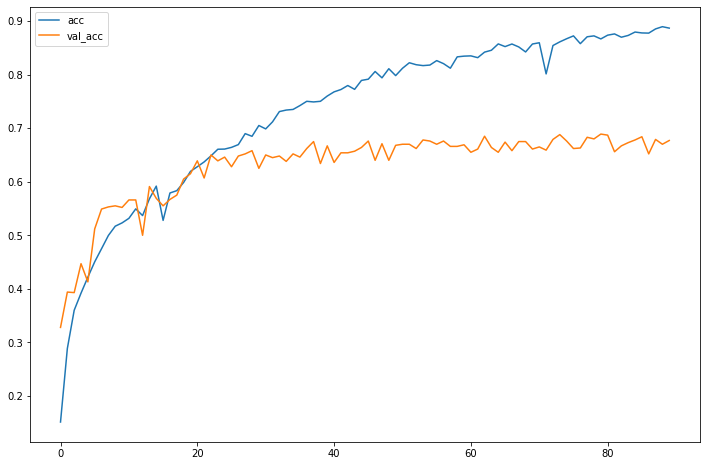

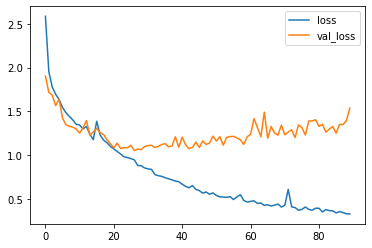

1000/1000 [==============================] - 0s 173us/step
Test loss: 1.4891575994491577
Test accuracy: 0.68


In [64]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])